## UK Crime Data
Source: https://data.police.uk/data/fetch/670feb56-8400-4d7e-81e9-8e2b9930d5eb/

In [1]:
import os
import glob
from tqdm import tqdm_notebook

import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import re

### Challenge: I wanted to find an efficient way to upload all files which are saved in different folders
Mission Accomplished!

In [2]:
# create list of folder names
folders = os.listdir(r'/Users/claudiadahinten/Desktop/DS_projects/uk_crime')

#create list of the path including the folder names
paths = []
for folder in folders:
    if folder.startswith('2'):
        path = r'/Users/claudiadahinten/Desktop/DS_projects/uk_crime/{}'.format(folder) # use your path
        paths.append(path)

#iterate through each path and locate the files ending in .csv
li = []
for path in tqdm_notebook (paths):
    all_files = glob.glob(path + "/*.csv")

#read each csv file and append it to a list 
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)
    
        
#create a neat dataframe out of the list
frame = pd.concat(li, axis=0, ignore_index=True)


In [3]:
frame.head(2)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,160b1254de69a05acad1b0ee52093a86cedfc1ed91e8d4...,2017-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-1.073626,51.806445,On or near Hill View,E01017643,Aylesbury Vale 010B,Other theft,Status update unavailable,NaN
1,NaN,2017-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.512773,51.411751,On or near Westfield Close,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN


In [4]:
frame.shape

(19734809, 12)

### Data Cleaning

#### 1) Rename columns

In [5]:
frame.rename(columns = {'Falls within': 'Police_Dep',
                          'LSOA code': 'LSOA_code',
                          'LSOA name': 'LSOA_name',
                          'Crime type': 'Crime_type',
                          'Last outcome category': 'Last_outcome_category'}, inplace = True)

#### 2) Drop redundant columns
Crime id: unique values only <br>
Context: has only missing values <br>
Reported by: all values are the same as Falls within

In [6]:
frame.isna().sum()

Crime ID                  4669996
Month                           0
Reported by                     0
Police_Dep                      0
Longitude                  391762
Latitude                   391762
Location                        0
LSOA_code                  861045
LSOA_name                  861045
Crime_type                      0
Last_outcome_category     4961280
Context                  19734809
dtype: int64

In [7]:
np.unique(frame ['Reported by'] == frame ['Police_Dep'])

array([ True])

In [8]:
frame.drop(columns = ['Crime ID', 'Context', 'Reported by'], inplace = True)

#### 3) Create categories for crime

In [9]:
frame.groupby('Crime_type').count()

,Month,Police_Dep,Longitude,Latitude,Location,LSOA_code,LSOA_name,Last_outcome_category
Crime_type,,,,,,,,
Anti-social behaviour,4508347,4508347,4489190,4489190,4508347,4312570,4312570,0
Bicycle theft,289534,289534,281311,281311,289534,278603,278603,269081
Burglary,1266829,1266829,1245616,1245616,1266829,1226643,1226643,1246986
Criminal damage and arson,1733357,1733357,1697716,1697716,1733357,1644191,1644191,1669040
Drugs,457715,457715,444506,444506,457715,424670,424670,432556
Other crime,299154,299154,290056,290056,299154,282314,282314,289334
Other theft,1619610,1619610,1579258,1579258,1619610,1540258,1540258,1555683
Possession of weapons,132165,132165,128742,128742,132165,125578,125578,126923
Public order,1229888,1229888,1197354,1197354,1229888,1194127,1194127,1197467


In [10]:
def category_maker (column):
    if column == 'Bicycle theft' or column == 'Burglary' or column == 'Other theft' or column == 'Robbery' or \
    column == 'Shoplifting' or column == 'Theft from the person':
        return 'Theft'
    elif column == 'Criminal damage and arson' or column == 'Violence and sexual offences':
        return 'Violent'
    elif column == 'Anti-social behaviour' or column == 'Possession of weapons' or column == 'Public order' or \
    column == 'Vehicle crime':
        return 'Non-Violent'
    elif column == 'Drugs':
        return 'Drugs'
    elif column == 'Other crime':
        return 'Other crime'
    else:
        return '?'

In [11]:
frame['Category'] = frame['Crime_type'].map(category_maker)

In [12]:
frame['Category'].unique()

array(['Theft', 'Non-Violent', 'Violent', 'Drugs', 'Other crime'],
      dtype=object)

### Save to csv

In [13]:
frame.to_csv(r'uk_crime.csv', index = False)

In [14]:
complete = pd.read_csv('uk_crime.csv')

### Cleaning
 Create a datetime object for date and create a new column for month and year

In [15]:
complete['Date'] = pd.to_datetime(complete['Month'], format='%Y-%m')
complete['Year'] = complete['Date'].dt.year
complete['Month'] = complete ['Date'].dt.month

### EDA
Drop 2016 rows as missing data (highly unlikely there were only crimes in December that year)

In [16]:
complete.head()

,Month,Police_Dep,Longitude,Latitude,Location,LSOA_code,LSOA_name,Crime_type,Last_outcome_category,Category,Date,Year
0,10,Avon and Somerset Constabulary,-1.073626,51.806445,On or near Hill View,E01017643,Aylesbury Vale 010B,Other theft,Status update unavailable,Theft,2017-10-01,2017
1,10,Avon and Somerset Constabulary,-2.512773,51.411751,On or near Westfield Close,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,Non-Violent,2017-10-01,2017
2,10,Avon and Somerset Constabulary,-2.513718,51.429407,On or near A4174,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,Non-Violent,2017-10-01,2017
3,10,Avon and Somerset Constabulary,-2.513343,51.408772,On or near Lincoln Close,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,Non-Violent,2017-10-01,2017
4,10,Avon and Somerset Constabulary,-2.512773,51.411751,On or near Westfield Close,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,Theft,2017-10-01,2017


In [52]:
#Further explore why there are so few values for 2016
complete.Year.value_counts()

2018    6647369
2017    6586451
2019    6006192
2016     494797
Name: Year, dtype: int64

In [70]:
#Turns out data for 2016 must be missing as only December is reported
complete.groupby(['Year','Month']).count().reset_index().iloc[0:10,:3]

,Year,Month,Falls within
0,2016,12,494797
1,2017,1,487951
2,2017,2,475887
3,2017,3,556414
4,2017,4,544189
5,2017,5,577329
6,2017,6,573879
7,2017,7,601291
8,2017,8,583573
9,2017,9,543610


#### Drop 2016

In [17]:
complete = complete[complete['Year'] != 2016]

In [18]:
complete['Year'].value_counts()

2018    6647369
2017    6586451
2019    6006192
Name: Year, dtype: int64

#### Crime by month over the years

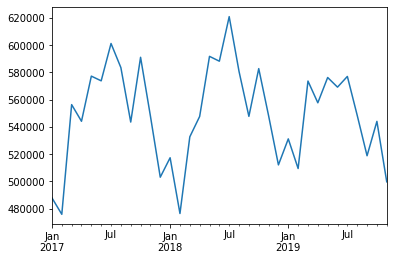

In [19]:
#Looks like there's a bit of a seasonal trend - more crime in the summer
complete['Date'].value_counts().sort_index().plot();

#### Crime type

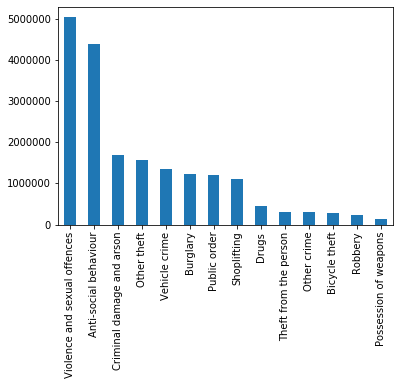

In [20]:
#Surprising and sad to see that violent and sexual offences are the most common crimes. Maybe this is because
#these are reported more often than other crimes?
complete["Crime_type"].value_counts().plot.bar();

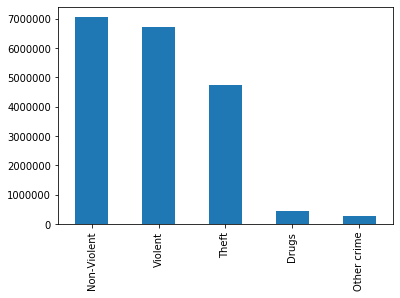

In [21]:
complete["Category"].value_counts().plot.bar();

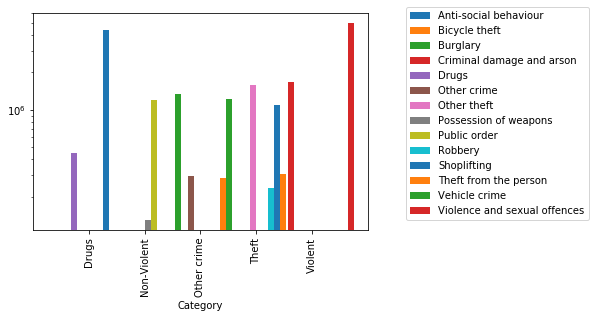

In [22]:
#Plot the crimes grouped by categories on a log scale to make the graph more readable
complete.groupby(['Category', 'Crime_type']).count()['Month'].unstack().plot.bar(log = True, width = 1.5)
plt.legend(loc = 'lower right')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

#### Crimes Reported to Police Stations

In [23]:
#Metropolitan Police have by far the most crimes reported
complete.groupby('Police_Dep').count()['Category'].reset_index().sort_values('Category', ascending = False)[:10]

,Police_Dep,Category
25,Metropolitan Police Service,3117967
15,Greater Manchester Police,998318
43,West Yorkshire Police,977998
42,West Midlands Police,853947
20,Kent Police,631994
30,Northumbria Police,611681
21,Lancashire Constabulary,596548
13,Essex Police,576199
39,Thames Valley Police,563047
34,South Yorkshire Police,562475


In [24]:
#Create a new column by LSOA which I am using as aproxy for "Council"
complete['Short_LSOA_name'] = complete['LSOA_name'].str.extract(r'([^0-9]+)')

In [25]:
complete.groupby('Short_LSOA_name').count()['Category'].reset_index().sort_values('Category', ascending = False)[:10]

,Short_LSOA_name,Category
18,Birmingham,374853
159,Leeds,342064
170,Manchester,287000
330,Westminster,243933
28,Bradford,242910
247,Sheffield,217436
165,Liverpool,214252
73,County Durham,186978
35,Bristol,183309
187,Newcastle upon Tyne,169546


#### London's Most Dangerous Councils

In [26]:
london = complete[complete['Police_Dep'] == 'Metropolitan Police Service']

In [27]:
london.groupby('Short_LSOA_name').count()['Category'].reset_index().sort_values('Category', ascending = False)[:10]

,Short_LSOA_name,Category
310,Westminster,229159
43,Camden,133988
287,Tower Hamlets,133447
251,Southwark,127379
147,Lambeth,127255
178,Newham,124097
114,Hackney,116061
72,Croydon,111886
28,Brent,111647
119,Haringey,111201


#### Crime by Location

In [28]:
complete.groupby('Location').count()['Category'].reset_index().sort_values('Category', ascending = False)[:10]

,Location,Category
231054,On or near Supermarket,657386
182767,On or near Parking Area,608262
214879,On or near Shopping Area,453694
187332,On or near Petrol Station,384315
0,No Location,383277
220841,On or near Sports/Recreation Area,315477
172947,On or near Nightclub,168876
184482,On or near Pedestrian Subway,158579
119399,On or near High Street,91850
125481,On or near Hospital,88493


In [29]:
complete.to_csv(r'uk_crime_complete.csv', index = False)

### Conclusions

So far following conclusions have been made:
- Between 2017 and 2018 there have been over 19 million reported crimes in the UK
- Unsurprisingly most crimes (3 million) are reported to the London Metropolitan Police
- If you live in London you want to stay away from Westminster, Camden and Tower Hamlets if you wants to stay safe
- Interestingly the council (LSOA) with the most crime in the UK is Birmingham
- The majority of crimes occur near Supermarkets, Parking Areas and Shopping Areas
- Violent and sexual crimes are the highest reported crimes
- Crime appears to be seasonal as they increase during the summer in each year, there is also a big rop in December and subsequent increase in January
     
To better visualise this I've created a Tableau dashboard, which can be viewed here: https://tinyurl.com/t5oduw9
- In particular I was interested in:
    - Creating a Dashboard to visualise the above on one page
    - Showing the hotspots for crimes in a map
    - Creating more interactivity for the user